<center>
    <img src="https://raw.githubusercontent.com/dvgodoy/PyTorch101_ODSC_Europe2020/master/images/linear_dogs.jpg" height="400" width="800"> 
</center>  

# Yet another math for DS course: домашнее задание 2

**ФИО:**

**Социальный бонус [1 балл]:** у нас онлайн-магистратура, но это не отменяет движа. Сходите куда-нибудь с однокурсниками и прикрепите фото с этого похода сюда.

## Общая информация


__Дата выдачи:__ 18.10.2023

__Мягкий дедлайн:__ 23:59MSK 19.11.2023

__Жёсткий дедлайн:__ 23:59MSK 26.11.2023

## Формат сдачи

Сам ноутбук называйте в формате hw-02-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## Оформление

1. Be good, drink milk and [think of Russia](https://www.youtube.com/watch?v=jyxSFfBKMxQ)
2. Обязательно фиксируйте зерно генератора случайных чисел в экспериментах. При перезапуске кода значения не должны меняться.
3. Вверху файла подпишите фамилию, имя, группу и какой-то занимательный факт о себе.
4. Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. 

> За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.


Для каждого построенного графика делайте выводы. Эти выводы не должны быть поверхностными и очевидными. Не будьте мудрым королём.

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/king.png" width="300"> 
</center>

**Пример плохого вывода:** Синенькая линия идет вверх, а красная вниз. Черненькая идет вниз, а потом вверх. 

<br>

<center>
<img src="https://raw.githubusercontent.com/hse-econ-data-science/andan_2023/main/hw/bad_lines.png" width="600"> 
</center>

In [1]:
# Библиотека для работы с матрицами
import numpy as np 

# Алгоритмы линейной алгебры
import scipy.linalg as sla

# Библиотека для работы с разреженными матрицами
import scipy.sparse as sps

# Алгоритмы линейной алгебры для разреженных матриц
import scipy.sparse.linalg as spla

# Графическая библиотека
import matplotlib.pyplot as plt

# Позволяет отрисовывать графики и изображения прямо в ноутбуке, а не в отдельном окне. Жизненно важная вещь!
%matplotlib inline

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Часть 1: точность вычислений

## [20 баллов] Задача №1: точность вычислений

С точки зрения математики матричные разложения являются точными: произведение сомножителей всегда равняется исходной матрицы $A$. К сожалению, на практике этом часто мешает вычислительная погрешность. 

Для $LU$ разложения $l_2$-норма ошибки ошибки $||\delta A|| = ||A - LU||$ удовлетворяет следующей оценке:

$$||\delta A|| \leqslant ||L|| \cdot ||U|| \cdot O(\varepsilon_{machine})$$

А нормы $L$ и $U$ могут быть совсем нехорошими.

__[5 баллов] Задание 1.1__ Рассмотрим следующее LU-разложение:

$$
\begin{pmatrix}
1 & 0\\
10^{20} & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
10^{-20} & 1\\
0 & 1 - 10^{20}
\end{pmatrix}
$$
и
$$
\begin{pmatrix}
1. & 0.\\
10.^{20} & 1.
\end{pmatrix}
\cdot
\begin{pmatrix}
10.^{-20} & 1.\\
0. & 1. - 10.^{20}
\end{pmatrix}
$$

Во втором случае мы специально указали Питону (поставив везде десятичные точки), что хотим работать не с целыми числами, а с числами с плавающей точкой. Перемножьте полученные матрицы $L$ и $U$. Как ответ вам кажется правильным, почему?

> __Ответ:__ тут нужен ваш текст !!!

In [ ]:
# your code here
# (♡-_-♡) 

Отметим, что в реальных вычислениях матричные элементы почти наверняка с самого начала будут числами с плавающей точкой (а не целыми).

**Выход: LU-разложение с выбором главного элемента (по столбцу)**

Каждый раз ищем максимум в столбце и переставляем соответствующую строку наверх.

$$\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow
\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & b_{i+1,i} & b_{i+1,i+1} & \dots & b_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & \color{blue}{b_{ii}} & \color{blue}{b_{i,i+1}} & \dots & \color{blue}{b_{in}} \\
 & & \vdots & \vdots & & \vdots\\
\end{pmatrix}\longrightarrow$$
$$\longrightarrow\begin{pmatrix}
b_{11} & \dots & b_{1i} & b_{1,i+1} & \dots & b_{1n}\\
 & \ddots & \vdots & \vdots & & \vdots\\
 & & \color{green}{b_{ji}} & \color{green}{b_{j,i+1}} & \dots & \color{green}{b_{jn}} \\
 & & 0 & b'_{i+1,i+1} & \dots & b'_{i+1,n}\\
 & & \vdots & \vdots &  & \vdots \\
 & & 0 & b'_{i,i+1} & \dots & b'_{in} \\
 & & \vdots & \vdots & & \vdots
\end{pmatrix}$$

Надо сказать, что примерно так вы все и решали системы на первом курсе университета! Именно наибольший, а не первый ненулевой элемент столбца берётся потому, что чем больше число - тем меньшие погрешности потенциально вносит деление на него.

Что при этом происходит? Перестановка строк матрицы равносильна умножению её слева на матрицу соответствующей перестановки. Таким образом, мы получаем равенство

$$L_nP_nL_{n-1}P_{n-1}\ldots L_2P_2L_1P_1 A = U\qquad\qquad(1)$$

где $L_1,\ldots,L_n$ - некоторые нижнетреугольные матрицы.

**Вопрос:** Ну, и где здесь матрица $L$?!

**Ответ:** Введём новые матрицы

\begin{align*}
L'_n &= L_n\\
L'_{n-1} &= P_nL_nP_{n-1}\\
L'_{n-2} &= P_nP_{n-1}L_{n-1}P_n^{-1}P_{n-1}^{-1}\\
&\ldots\\
L'_1 &= P_nP_{n-1}\ldots P_2L_1P_2^{-1}\ldots P_{n-1}^{-1}P_n^{-1}
\end{align*}

**Упражнение.** Матрицы $L'_i$ тоже нижнетреугольные!

Тогда левая часть (1) перепишется в виде

$$\underbrace{L'_nL'_{n-1}\ldots L'_1}_{:=L^{-1}}\underbrace{P_nP_{n-1}\ldots P_1}_{:=P^{-1}}\cdot A$$

**Итог:** разложение вида
$$A = PLU$$
где $P$ - матрица перестановки.

Функция `scipy.linalg.lu` в Питоне находит именно такое разложение!

Все элементы $L$ не превосходят $1$, так что $||L||]\leqslant 1$. При этом
$$||\Delta A|| \leqslant ||A||\cdot O(\rho \varepsilon_{machine}),$$
где
$$\rho = \frac{\max_{i,j}|u_{ij}|}{\max_{i,j}|a_{ij}|}$$
Это число называется *фактором роста матрицы*.

Но что, если это отношение велико?

__[5 баллов] Задание 1.2__  Сгенерируйте матрицу $500\times500$, имеющую вид

$$\begin{pmatrix}
1 & 0 & 0 & \cdots & 0 & 0 & 1\\
-1 & 1 & 0 &  &  & 0 & 1\\
-1 & -1 & 1 & 0  &  & 0 & 1\\
\vdots & & \ddots & \ddots  & \ddots & \vdots & \vdots \\
-1 & -1 & -1 & \ddots & 1 & 0 & 1\\
-1 & -1 & -1 &  & -1 & 1 & 1\\
-1 & -1 & -1 & \cdots & -1 & -1 & 1
\end{pmatrix}$$

Например, вы можете сгенерировать сначала нулевую матрицу нужного размера, а потом заполнить её клетки правильными числами.

Найдите её PLU-разложение и QR-разложение. Убедитесь, что $P = E$. Вычислите $||A - LU||_2$ и $||A - QR||_2$. Чему равен фактор роста матрицы $A$?

In [ ]:
# your code here
# (｡❤‿❤｡)

К счастью, на практике так редко очень бывает (чёрт его знает почему). Тем не менее, QR-разложение всё-таки лучше. Теоретическая оценка для ошибки QR-разложения имеет вид

$$||A - QR||_2 \leqslant ||A||_2\cdot O(\varepsilon_{machine})$$

__[5 баллов] Задание 1.3__  Рассмотрим *матрицу Паскаля* $S_n = \left(C_{i + j}^i\right)$ ($i,j = 0,\ldots,n-1$).

Каково её LU-разложение? Выведите формулы для матриц L и U и приведите краткое обоснование прямо в ноутбуке. Не пользуйтесь функцией `scipy.linalg.lu`, чтобы его "угадать": матрица P будет отлична от единичной, и вы получите не то, что хотели.

Каков её определитель?

> __Ответ:__ Ваши формулы (ручное решение задачки вбитое в маркдаун)

__[5 баллов] Задание 1.4__ Напишите функцию `my_pascal(n)`, генерирующую матрицу Паскаля размера $n\times n$.

In [ ]:
# your code here
# =^･ｪ･^=

Найдите норму разности $||A - PLU||_2$. Не такая уж и большая, правда?

In [ ]:
# your code here
# (❍ᴥ❍ʋ)

Теперь попросим компьютер вычислить определитель матрицы Паскаля $30\times30$ и решить простенькую систему уравнений:

In [ ]:
# your code here
#  ლ(ಠ益ಠლ)

Так себе ошибка. Теперь попробуем сделать это с помощью QR-разложения. Станет ли лучше?

In [ ]:
# your code here
# (⌐■_■)

Объясните полученные неприятные результаты.

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

## [20 баллов] Задача №2:  решение СЛАУ

Реализуйте несколько алгоритмов решения СЛАУ $Ax = B$, где $A = A^T$, $A \geqslant 0$ с матричной правой частью $B$.
ф
1. **Наивный способ**: $x = A^{-1}B$;

2. **Стандартный способ**: с помощью процедуры `solve` модуля `scipy.linalg`;

3. **Разложение Холецкого**: с помощью разложения Холецкого для матрицы $A$ и последующего решения двух СЛАУ с треугольными матрицами;

4. **Разложение Холецкого с процедурами scipy**: с помощью разложения Холецкого для матрицы $A$ и специальных процедур из пакета `scipy.linalg` (`cho_factor`, `cho_solve`).

Для решения СЛАУ с треугольной матрицей можно воспользоваться функцией `solve_triangular` из пакета `scipy.linalg`.

In [ ]:
def naive_solve(A, B):
    # Your code here
    raise NotImplementedError()
    
def standard_solve(A, B):
    # Your code here
    raise NotImplementedError()
    
def cho_solve(A, B):
    # Your code here
    raise NotImplementedError()
    
def scipy_cho_solve(A, B):
    # Your code here
    raise NotImplementedError()

__[10 баллов] Задание 2.1__ Проведите тестирование реализованных алгоритмов на небольшой СЛАУ на предмет совпадения ответов

In [ ]:
# your code here
# ( ￣ー￣)

__[10 баллов] Задание 2.2__ Проведите эксперименты и выясните, как меняется время работы этих методов

- с ростом размера матрицы $A$ при фиксированном числе правых частей. Рассмотрите системы с 10, 100, 1000 правых частей;

- с ростом числа правых частей при фиксированном размере матрицы $A$ (например, $100\times100$).

Обязательно нарисуйте графики (время работы от размера). Какой метод оказывается более быстрым?

Для тестирования вам пригодятся случайные матрицы, сгенерированные с помощью функции `numpy.random.randn`. Но не забудьте, что в задаче речь идёт о *симметрических положительно определённых матрицах*. Так что подумайте, как из случайных матриц сделать симметрические положительно определённые.

Матрицы левых частей должны быть не менее $100\times100$: при меньших размерностях заметную роль могут играть факторы, не имеющие отношения к алгебре. Мы рекомендуем рассматривать системы с матрицами размера от 100 до 1000 и с числом правых частей от 10 до 10000. Приготовьтесь к тому, что эксперименты могут занять какое-то время.

In [ ]:
# your code here
# ༼ つ ಥ_ಥ ༽つ

## [20 баллов] Задача №3: Разреженные матрицы

- [Вот здесь](http://docs.scipy.org/doc/scipy/reference/sparse.html) можно посмотреть, как различные форматы разреженных матриц реализованы в библиотеке `scipy`.
- [Вот здесь](https://www.cise.ufl.edu/research/sparse/matrices/index.html) выложено много разреженных матриц из разнообразных приложений. Что особенно приятно, сайт предоставляет удобный клиент для скачивания, в котором доступен предпросмотр и данные о том, являются ли матрицы симметричными или положительно определёнными.
- [Вот тут в туториале можно найти много полезных функций](https://matteding.github.io/2019/04/25/sparse-matrices/)

__[5 баллов] Задание 3.1__ Разные форматы разреженных матриц можно преобразовывать друг в друга. Преобразование из формата `LIL` в формат `CSR` занимает гораздо больше времени, чем преобразования между форматами `COO`, `CSR` и `CSC`. Почему так происходит?

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

__[15 баллов] Задание 3.2__ Торговая сеть предоставила вам данные о покупках своих клиентов, представляющие собою 
таблицу со столбцами 
* Номер записи
* *InvoiceNo* - номер чека
* *StockCode* - код товара
* *Description* - название товара

Чтобы понять, какие товары покупают вместе, вы решили построить (разреженную) матрицу, строки и столбцы которой соответствуют различным товарам, а в клетке с "номером" $(g_1, g_2)$ стоит число $c(g_1 \& g_2)$ --- количество чеков, содержащих оба товара. 

Ниже приведён код, который вам нужно дополнить, дописав функцию ``CreateMatrix``, создающая из структуры pandas.DataFrame разреженную матрицу. Ваша реализация должна удовлетворять следующим свойствам:
* матрица должна создаваться эффективно и по возможности с минимальным числом циклов;
* итоговая матрица должна позволять быстро отвечать на следующие вопросы:
  - сколько всего было куплено товаров данного типа?
  - какие пары товаров покупались вместе чаще всего?
  - какие товары чаще всего покупались вместе с данным товаром?

Пожалуйста, объясните, почему вы выбрали именно ту, а не иную архитектуру.

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

Загрузим данные:

In [2]:
import pandas as pd
receipts = pd.read_csv('data/Online Retail Short.csv', sep=';')

Распечатаем первые несколько строк, чтобы осознать структуру данных:

In [3]:
receipts.head()

,Unnamed: 0,InvoiceNo,StockCode,Description
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER
1,1,536365,71053,WHITE METAL LANTERN
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.


А теперь та самая функция. Вам могут пригодиться следующие конструкции:

* ``for name, group in data.groupby('InvoiceNo')`` --- цикл, в котором ``name`` будут различными значениями ``InvoiceNo``, а ``group`` --- кусками нашего ``DataFrame`` с заданным значением ``InvoiceNo``.
* ``for g1, g2 in itertools.combinations(list(group['StockCode']), 2)`` --- цикл, пробегающий пары различных элементов (сочетания по 2) из списка товаров из заданной группы.


In [ ]:
import scipy.sparse as sps
import itertools

# Зачем бы нужны следующие две строки?)
idx2code = sorted(set(receipts['StockCode']))
code2idx = {code : i for i, code in enumerate(idx2code)}

def CreateMatrix(data):
    '''
    Ввод
    -----
    receipts: структура pandas.DataFrame
    
    Вывод
    ------
    res: разреженная матрица
    '''
    
    # your code here
    # ヾ(๑╹◡╹)ﾉ
    
    raise NotImplementedError()

А теперь с помощью созданной вами матрицы ответьте на несколько вопросов:

1) Какая пара товаров была куплена вместе наибольшее число раз? Пожалуйста, в качестве ответа укажите не id, а названия из столбца ``Descriptions``.

2) Что чаще всего покупали вместе с ``KNITTED UNION FLAG HOT WATER BOTTLE``?

В вашем ноутбуке должно быть продемонстрировано, как вы это находите с помощью матрицы!

In [ ]:
# your code here
# ฅ^•ﻌ•^ฅ 

# Часть 2: сингулярное разложение

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия" максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

## [20 баллов] Задача №4: Сжатие данных с помощью SVD

Попробуем поработать с какой-нибудь картинкой.

In [13]:
!pip3 install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.1/33.1 MB 4.9 MB/s eta 0:00:00m eta 0:00:010:01:01m


In [17]:
import cv2 as cv
img = cv.imread("data/chain_small.jpg")
img.shape

(488, 653, 3)

In [18]:
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD
img.shape

(488, 653)

Нарисуем картинку.

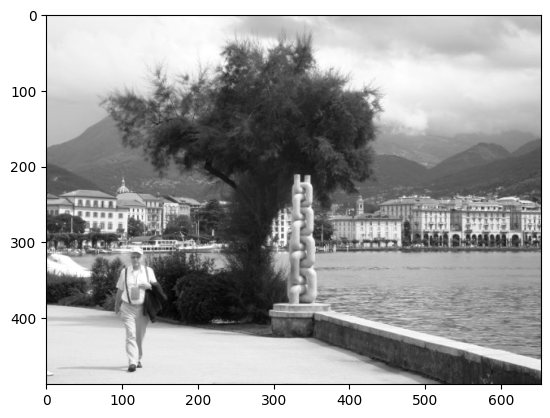

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Построим сингулярное разложение этой матрицы.

In [20]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

__[5 баллов] Задание 4.1__ Нарисуйте график диагональных элементов матрицы $\Sigma$:

In [ ]:
# your code here
# ʕ•ᴥ•ʔ

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

__[5 баллов] Задание 4.2__ Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

In [ ]:
# your code here
# [✖‿✖]

__[5 баллов] Задание 4.3__  Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

In [ ]:
# your code here
# ┌(ಠ_ಠ)┘

__[2 балла] Задание 4.4__  Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

In [ ]:
# your code here
# ( .-. )

__[2 балла] Задание 4.5__ Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

__[1 балл] Задание 4.6__ Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

_Hint:_ достаточно сохранить да файла на компьютер в `.np` формате и сравнить их вес между собой. 

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

## [20 баллов] Задача №5: Снижение размерности с помощью SVD

В этом задании вам предстоит работать с подмножеством датасета, повествующего о химическом составе воды в некоторых реках (источник датасета здесь: http://data.europa.eu/euodp/en/data/dataset/data_waterbase-rivers-10). Данные лежат в файле `dataset_final`.

Загрузим же его поскорей:

In [21]:
import pickle
index_list, feature_list, data_matrix = pickle.load(open('data/dataset_final', 'rb'))

Несколько слово о том, что это за три сущности:
* `index_list` - список id рек, которые были отобраны для задания (если вам захочется узнать, что именно скрывается за этими ужасными id, расшифровки есть в таблице `Waterbase_rivers_v14_Stations.csv`, которую мы для удобства загрузили на вики)
* `feature_list` - список признаков (они имеют вид `год ПРОБЕЛ показатель`)
* `data_matrix` - собственно данные (строки соответствуют рекам из `index_list`, а столбцы - признакам из `feature_list`)

Ваше первое задание - сделать так, чтобы отрисовка всех объектов в координатах первых двух "скрытых" признаков, полученных с помощью SVD, давала хорошую визуализацию датасета. Изначально к этому будут некоторого рода препятствия; мы ожидаем, что вы их устраните.

Сравните результаты с тем, что получилось бы, если воспользоваться [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/random_projection.html). Они вызываются следующими заклинаниями:

```
X = # Your matrix
transformer = random_projection.GaussianRandomProjection(n_components='''how many?''')
X_new = transformer.fit_transform(X)
```

Попробуйте понять, какой физический смысл имеют первые три "скрытых" признака, полученных с помощью SVD.

Какие выводы о данных вы можете сделать из построенной визуализации?

In [ ]:
# your code here
# \_(ツ)_/¯

> __Ответ:__ Ваш ответ буквами прям в маркдауне:3 

_Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются._

-----------   

# Часть 3: бонусные задания, чтобы намайнить баллов

Задачи из этого раздела необязательны для решения. Но мало ли вам захочется получить побольше баллов либо заменить какие-то скучные задачи из предыдущего раздела на нескучные.

## [20 баллов] Задача №6: SVD и свёртки

В компьютерном зрении важную роль играет операция свёртки. Вообще говоря, сворачивать приходится не только матрицы, но и более сложные тензоры, однако в этом задании мы для простоты будем работать только с матрицами.

В этом задании мы будем считать, что индексы элементов в матрицах нумеруются с нуля.

Пусть $B$ - матрица. *Свёртка* матрицы $A$ с ядром (или, как ещё говорят, с фильтром) $B$ - это матрица

$$(A * B)_{ij} = \sum_{p, q}a_{pq}b_{i - p, j - q}$$

Эту загадочную операцию можно проинтерпретировать следующим образом: для каждого элемента матрицы $A$ мы умножаем его "окрестность" (размеры этой окрестности зависят от размеров фильтра) поэлементно на соответствующие коэффициенты из ядра и всё это складываем:

<img src="http://colah.github.io/posts/2014-07-Understanding-Convolutions/img/RiverTrain-ImageConvDiagram.png">

Таким образом, каждый элемент $A$ мы как-то обновляем с учётом его соседей. Скажем, свёртка с ядром

$$B = \frac19\begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix}$$

будет размывать изображение.

У вас может возникнуть вопрос: а что происходит на краях? Пусть $A$ - матрица $m\times n$, а $B$ - матрица $k\times l$. Есть разные варианты, например, такие:

- можно считать, что "за пределами" $A$ и $B$ тоже есть элементы, но просто они равны нулю; тогда результат свёртки будет иметь размер $(m + k - 1)\times(n + l - 1)$;
- можно точно так же считать, что элементы, лежащие "за пределами" $A$ и $B$ равны нулю, но законными считать только те компоненты свёртки, для которых "центр" фильтра попадает в матрицу $A$, тогда результат свёртки будет иметь такой же размер, как и $A$;
- можно считать законными только те компоненты свёртки, для которых фильтр целиком помещается "внутри" $A$; в этом случае результат свёртки будет меньшего размера, чем исходная матрица, а именно $(m - k + 1)\times(n - l + 1)$.

Дальше мы будем по умолчанию считать, что границы обрабатываются первым из указанных способов.

Свёртка называется *сепарабельной*, если она представляется в виде композиции свёрток

$$A * B = (A * U) * V,$$

где $U$ и $V$ - матрицы $(2t+1)\times1$ и $1\times(2s+1)$ (или $1\times(2s+1)$ и $(2t+1)\times1$).

__[4 балла] Задание 6.1__

Сверните фотографию с фильтром

$$B = \begin{pmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{pmatrix}$$

In [22]:
import cv2 as cv
img = cv.imread("data/chain_small.jpg")
img.shape

(488, 653, 3)

In [23]:
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD
img.shape

(488, 653)

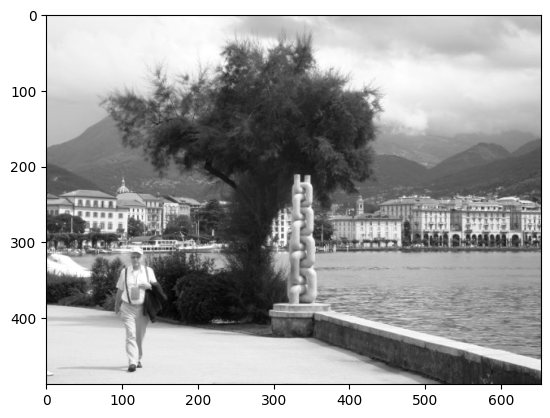

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

In [ ]:
# your code here
# ( ͡⊙ ͜ʖ ͡⊙)

__[4 балла] Задание 6.2__ Проверьте, что операция свёртки (в которой границы обрабатываются первым из указанных способов!) ассоциативна, то есть 

$$
(A * B) * C = A * (B * C)
$$

In [ ]:
# your code here
# ٩(x̯x)۶

__[4 балла] Задание 6.3__ Убедитесь, что сепарабельную свёртку можно посчитать быстрее, чем не сепарабельную;

Если свёртка не является сепарабельной, нам нужно сделать $$O(h_{img} \cdot w_{img} \cdot h_K \cdot w_K )$$ операций. Если свёртка сепарабельная, её ядро можно представить в виде произведения двух векторов. То есть операция свёртки разбивается на две и осуществляется за $$O(h_{img} \cdot w_{img} \cdot h_K \cdot 1) + O(h_{img} \cdot w_{img} \cdot 1 \cdot w_K)$$ операций. Убедимся в том, что сепарабельная свёртка быстрее с помощью симуляций. 

В качестве сепарабельного ядра возьмём 


$$
K_1 = \frac19 \begin{pmatrix}
1 & 1 & 1\\
1 & 1 & 1\\
1 & 1 & 1
\end{pmatrix} = \frac{1}{9} \cdot \begin{pmatrix}
1, 1, 1
\end{pmatrix} \cdot \begin{pmatrix}
1 \\
1 \\
1
\end{pmatrix}
$$

В качестве несепарабельной свёртки возьмём ядро для детектирования границы

$$K_2 = \begin{pmatrix}
-1 & -1 & -1\\
-1 & 8 & -1\\
-1 & -1 & -1
\end{pmatrix}$$

In [ ]:
# your code here
# ｀、ヽ｀ヽ｀、ヽ(ノ＞＜)ノ ｀、ヽ｀☂ヽ｀、ヽ

__[4 балла] Задание 6.4__ Допустим, что вам нужно реализовать операцию свёртки с фильтром $B$, однако приоритетом для вас является скорее скорость, а не абсолютная точность, и поэтому вы готовы ценой не очень большой ошибки заменить исходную свёртку на какую-нибудь сепарабельную. Какую именно векторы $U$ и $V$ вы бы использовали в этом случае? Почему? Попробуйте оценить ошибку.

In [ ]:
# your code here
# (っ˘ڡ˘ς) 

__[4 балла] Задание 6.5__ Докажите, что любую свёртку можно выполнить, используя лишь операции свёртки с векторами (векторами-строками и/или векторами-столбцами) и операцию сложения.

In [ ]:
# your code here
# ٩(ˊ〇ˋ*)و

## [10 баллов] Задача №7: Неожиданно теоретическая задача

Для двух заданных матриц $A$ и $B$ одного размера найдите ортогональную матрицу $Q$, для которой норма Фробениуса разности $||QA - B||_F$ минимальна.

> __Ответ:__ Ваш ответ формулами прям в маркдауне:3 